In [108]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2


from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt
import pandas as pd
import trackpy as tp
from matplotlib import cm
pixel=7
micron=33.7
mpp=micron/pixel
mpp

from pandas import DataFrame, Series  # for convenience

import pims
import numpy as np

In [194]:
pixel=7
micron=33.7
mpp=micron/pixel
mpp
fps=24
cut=2
hz=0.5
#fps=24
#cut=2
#hz=0.5

period=int(fps/cut*(1/hz))
period

24

In [195]:
import pathlib
pathlib.Path().absolute()

PosixPath('/Users/yongdou/Dropbox/track')

In [196]:
#frames=pims.Video('20d02.avi')
d0=pd.read_csv("/Users/yongdou/Downloads/track/02032020/20dexp2_03.csv")

In [228]:
plt.imshow(frames[0])

NameError: name 'frames' is not defined

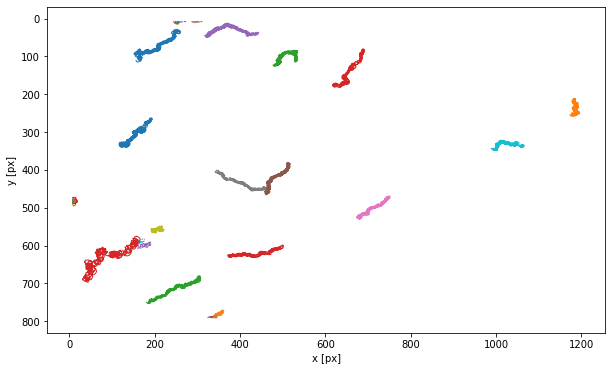

In [197]:
plt.figure()
tp.plot_traj(d0);

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


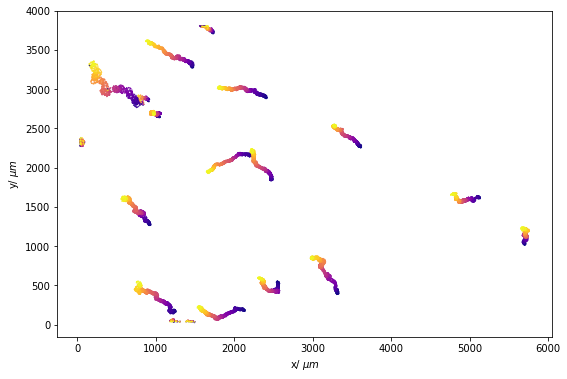

In [198]:
fig, ax = plt.subplots()

for i in list(set(d0["particle"])):
    d0i=d0[d0["particle"]==i]
    head=d0i['frame'].values[0]
    tail=d0i['frame'].values[-1]
    color=(d0i['frame'].values-head)/(tail-head)
    plt.scatter(d0i['x']*mpp,d0i['y']*mpp,linewidth=1,c=cm.plasma(color),s=0.2)
    #plt.plot(d0i['x'],d0i['y'],linewidth=1)
#plt.xlim(200,400)
#plt.ylim(0,200)
#plt.imshow(frames[0])
plt.xlabel(r'x/ $\mu m$')
plt.ylabel(r'y/ $\mu m$')
ax.set_aspect('equal')


#plt.plot(t_20_1['x'],t_20_1['y'],linewidth=0.8,c=cm.plasma(0.2),label="20Hz")

In [199]:
set(d0["particle"])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66}

In [206]:
partilcenumber=3
particle1=d0[d0["particle"]==partilcenumber]

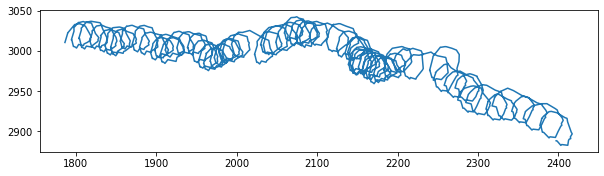

In [207]:
fig, ax = plt.subplots()
plt.plot(particle1['x']*mpp,particle1['y']*mpp)
ax.set_aspect('equal')

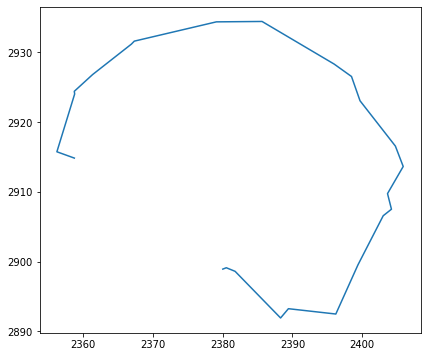

In [208]:
n=1

fig, ax = plt.subplots()
plt.plot(particle1['x'][period*n:period*(n+1)]*mpp,particle1['y'][period*n:period*(n+1)]*mpp)
ax.set_aspect('equal')

In [209]:
particle1['time']=particle1['frame']/(fps/cut)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
particle1.head()

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,time
3,13,599.925502,497.898424,4138.914273,2.547699,0.019376,127.685756,-50235.0,0.493919,0,3,0.000000
19,29,599.921877,497.901080,4097.873827,2.549340,0.029367,128.382929,-50207.0,0.605229,1,3,0.083333
35,45,599.903566,498.151292,3966.665133,2.545500,0.030182,124.262499,-50428.0,0.421533,2,3,0.166667
49,61,598.763973,499.134348,4067.356789,2.539610,0.035643,129.673012,-50339.0,0.331927,3,3,0.250000
66,77,598.980194,499.351939,4011.721426,2.556562,0.033664,127.241580,-50393.0,0.781285,4,3,0.333333


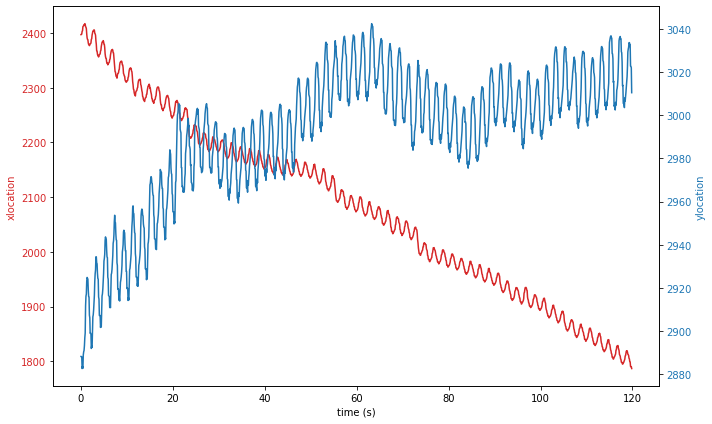

In [211]:
# Create some mock data


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('xlocation', color=color)
ax1.plot(particle1['time'].values,particle1['x'].values*mpp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ylocation', color=color)  # we already handled the x-label with ax1
ax2.plot(particle1['time'].values,particle1['y'].values*mpp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [213]:


dates = np.arange(len(particle1['x'].values*mpp))
datay = particle1['y'].values*mpp
datax = particle1['x'].values*mpp
dfy = pd.DataFrame({'data': datay}, index=dates)
dfx = pd.DataFrame({'data': datax}, index=dates)

# Reproduce the example in OP
resultx=seasonal_decompose(dfx, model='additive', freq=period)
resulty=seasonal_decompose(dfy, model='additive', freq=period)
####
observex=resultx.observed
seasonx=resultx.seasonal
trendx=resultx.trend
resx=resultx.resid
#####
observey=resulty.observed
seasony=resulty.seasonal
trendy=resulty.trend
resy=resulty.resid


Text(0, 0.5, 'Residual')

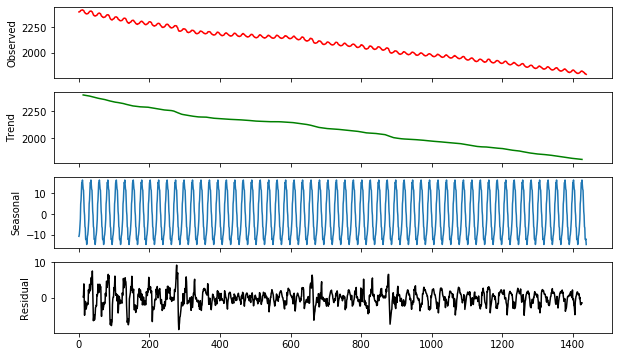

In [214]:
fig, axes = plt.subplots(4, 1, sharex=True)

resultx.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')
resultx.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
resultx.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
resultx.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

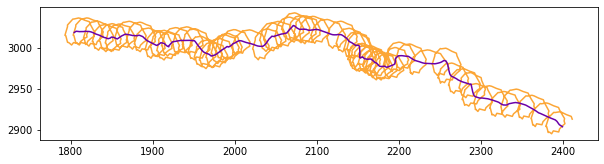

In [216]:
fig, ax = plt.subplots()
plt.plot(trendx.values+seasonx.values,trendy.values+seasony.values,c=cm.plasma(0.8))
plt.plot(trendx.values,trendy.values,c=cm.plasma(0.2))
#plt.plot(seasonx.values,seasony.values,linewidth=1,alpha=1)
ax.set_aspect('equal')


# the drift velocity

In [292]:
velocity = DataFrame({'dx':trendx['data'].values, 'dy': trendy['data'].values,'time':particle1['time'].values})
velocity=velocity.dropna()

In [293]:
velocity.head()

,dx,dy,time
12,2399.245680,2903.525334,1.000000
13,2398.546860,2903.976415,1.083333
14,2397.859381,2904.423067,1.166667
15,2397.210356,2904.835798,1.250000
16,2396.600202,2905.229485,1.333333


In [302]:
diff=pd.DataFrame.diff(velocity).dropna()
dx,dy=diff.sum()[['dx','dy']]

In [303]:
cycles=(velocity['time'].iloc[-1]-velocity['time'].iloc[0])/(1/hz)

In [304]:
velocity_x=dx/cycles/33.7
velocity_y=dy/cycles/33.7

In [308]:
diff['dvx']=diff['dx']/diff['time']
diff['dvy']=diff['dy']/diff['time']

-5.04850149817377 0.9748153702000204


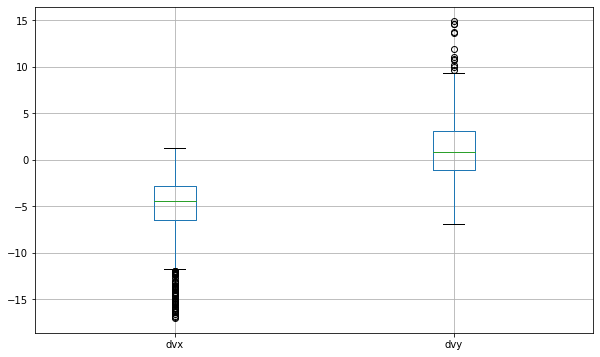

In [317]:
boxplot = diff.boxplot(column=['dvx', 'dvy'])
print(np.mean(diff['dvx']),np.mean(diff['dvy']))

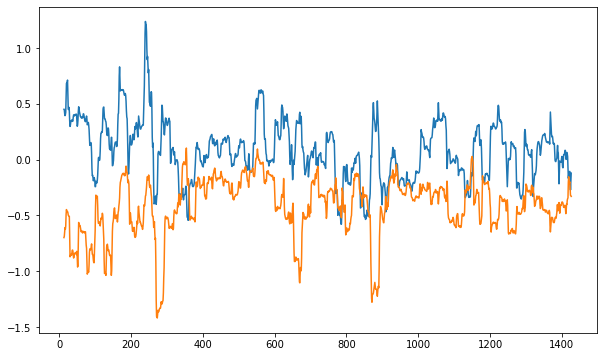

In [319]:
plt.plot(diff['dy'])
plt.plot(diff['dx'])